<a href="https://colab.research.google.com/github/eman-kom/tensorflow-fundamentals/blob/main/03_multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-29 05:59:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.15.112, 172.217.164.144, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.15.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M   197MB/s    in 2.5s    

2022-05-29 05:59:37 (197 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255.
)

test_datagen = ImageDataGenerator(
    rescale=1/255.
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_1.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [ ]:
history_1 = model_1.fit(
    train_data, 
    epochs=5, 
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 49s 208ms/step - loss: 2.1524 - accuracy: 0.2012 - val_loss: 1.9832 - val_accuracy: 0.2900
Epoch 2/5
235/235 [==============================] - 49s 208ms/step - loss: 1.8572 - accuracy: 0.3528 - val_loss: 1.8617 - val_accuracy: 0.3492
Epoch 3/5
235/235 [==============================] - 48s 203ms/step - loss: 1.5770 - accuracy: 0.4709 - val_loss: 1.8573 - val_accuracy: 0.3644
Epoch 4/5
235/235 [==============================] - 47s 199ms/step - loss: 1.0781 - accuracy: 0.6397 - val_loss: 2.2422 - val_accuracy: 0.3156
Epoch 5/5
235/235 [==============================] - 45s 193ms/step - loss: 0.4751 - accuracy: 0.8515 - val_loss: 3.0276 - val_accuracy: 0.3032


In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 11s 136ms/step - loss: 3.0276 - accuracy: 0.3032


[3.027578353881836, 0.30320000648498535]

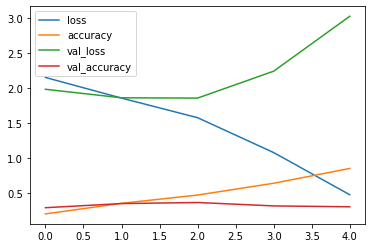

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [ ]:
model_2 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_2.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 29160)             0         
                                                                 
 dense_6 (Dense)             (None, 10)               

In [ ]:
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 44s 185ms/step - loss: 2.0775 - accuracy: 0.2599 - val_loss: 1.9233 - val_accuracy: 0.3008
Epoch 2/5
235/235 [==============================] - 43s 181ms/step - loss: 1.7762 - accuracy: 0.3903 - val_loss: 1.9008 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 43s 183ms/step - loss: 1.4713 - accuracy: 0.5175 - val_loss: 1.9089 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 43s 181ms/step - loss: 1.0574 - accuracy: 0.6683 - val_loss: 2.0381 - val_accuracy: 0.3428
Epoch 5/5
235/235 [==============================] - 43s 182ms/step - loss: 0.6555 - accuracy: 0.8127 - val_loss: 2.3862 - val_accuracy: 0.3168


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.3862 - accuracy: 0.3168


[2.386230230331421, 0.31679999828338623]

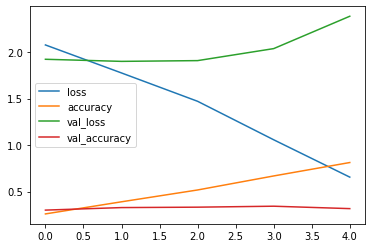

In [ ]:
pd.DataFrame(history_2.history).plot()

In [ ]:
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.


In [ ]:
model_3 = tf.keras.models.clone_model(model_1)
model_3.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [ ]:
history_3 = model_3.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
235/235 [==============================] - 111s 471ms/step - loss: 2.1956 - accuracy: 0.1843 - val_loss: 2.0352 - val_accuracy: 0.2732
Epoch 2/5
235/235 [==============================] - 110s 469ms/step - loss: 2.0964 - accuracy: 0.2512 - val_loss: 1.9809 - val_accuracy: 0.2844
Epoch 3/5
235/235 [==============================] - 111s 470ms/step - loss: 2.0420 - accuracy: 0.2776 - val_loss: 1.9388 - val_accuracy: 0.3252
Epoch 4/5
235/235 [==============================] - 110s 469ms/step - loss: 2.0065 - accuracy: 0.2967 - val_loss: 1.8364 - val_accuracy: 0.3640
Epoch 5/5
235/235 [==============================] - 111s 471ms/step - loss: 1.9781 - accuracy: 0.3072 - val_loss: 1.8481 - val_accuracy: 0.3616


In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 1.8481 - accuracy: 0.3616


[1.848050594329834, 0.36160001158714294]

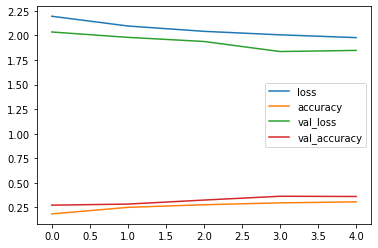

In [ ]:
pd.DataFrame(history_3.history).plot()

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg

--2022-05-29 07:30:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.009s  

2022-05-29 07:30:59 (192 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]

--2022-05-29 07:30:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 

In [ ]:
model_3.save("badly_trained_model")

INFO:tensorflow:Assets written to: badly_trained_model/assets


In [ ]:
tf.keras.models.load_model("badly_trained_model").evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 1.8481 - accuracy: 0.3616


[1.848050594329834, 0.36160001158714294]